# Rimple Singh

## Research question/interests

I will be looking to perform thorough analysis of the research data to visualize stock performances and draw conclusions from the visulaizations regarding market behavior. Our goal will be to minimize risk and increase returns while choosing a stock portfolio. 

# Data Analysis

Upon reviewing the data files in our raw data folder, I have decided to use proces-split-adjusted.csv file for data analysis since it contains the relevant pricing data for our project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
import project_functions1 as p1 
import datetime
import plotly.graph_objects as go

In [5]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['lines.linewidth'] = 2

In [3]:
# Import prices-split-adjusted.csv file from raw data directory for EDA
priceSplitDf = pd.read_csv('../data/raw/prices-split-adjusted.csv', index_col = 'date', parse_dates=True)
securitiesDf = pd.read_csv('../data/raw/securities.csv')

In [5]:
priceSplitDf.symbol.max()

'ZTS'

In [6]:
priceSplitDf.shape

(851264, 6)

In [6]:
priceSplitDf.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Performing a general analysis of the dataframe for Mean, count average values etc.

In [7]:
priceSplitDf.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [8]:
priceSplitDf.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

### Listing all the columns and their respective unique values, we get the following.

In [9]:
priceSplitDf.nunique(axis=0)

symbol       501
open       97522
close      98520
low        97470
high       97784
volume    171073
dtype: int64

In [10]:
priceSplitDf.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,851264.000000
mean,64.993618,65.011913,64.336541,65.639748,5415112.640027
std,75.203893,75.201216,74.459518,75.906861,12494681.433084
min,1.660000,1.590000,1.500000,1.810000,0.000000
25%,31.270000,31.292776,30.940001,31.620001,1221500.000000
50%,48.459999,48.480000,47.970001,48.959999,2476250.000000
75%,75.120003,75.139999,74.400002,75.849998,5222500.000000
max,1584.439941,1578.130005,1549.939941,1600.930054,859643400.000000


### Lets list all unique symbols for the companies listed in NYSE.

In [11]:
priceSplitDf['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

### Lets check to see if we have any null values in the data columns.

In [12]:
priceSplitDf.isnull().sum()

symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

## Stock close values for the FAAMG stocks given below 
We need to look into the stock values for close attribute. For this graph, we will be using a standard line graph which indicate close values across the 6 year time between 2010-2016.


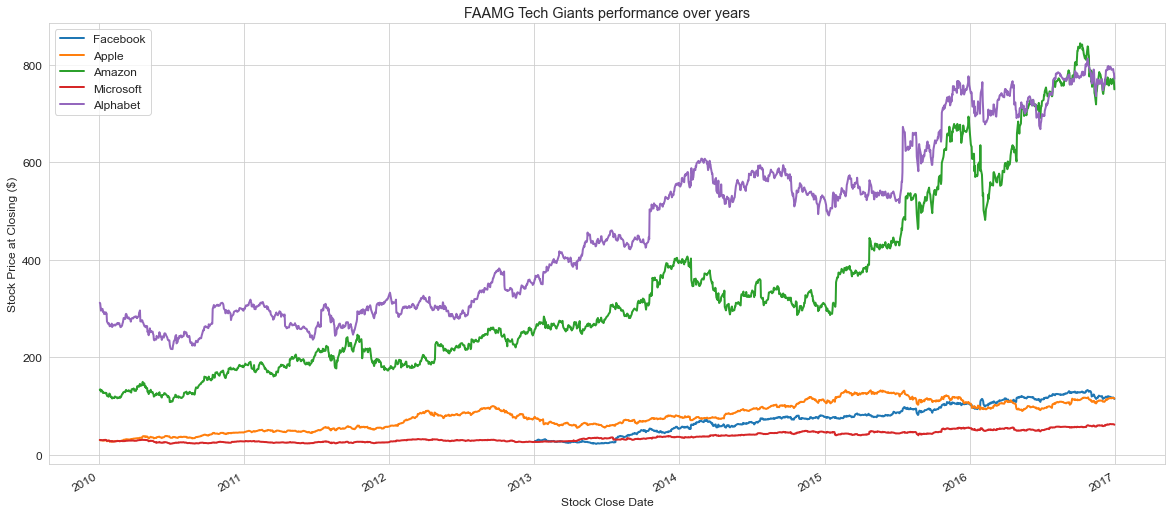

In [6]:
googlePricesDf = priceSplitDf.query("symbol == 'GOOG'")
applePricesDf = priceSplitDf.query("symbol == 'AAPL'")
amazonPricesDf = priceSplitDf.query("symbol == 'AMZN'")
microsoftPricesDf = priceSplitDf.query("symbol == 'MSFT'")
facebookPricesDf = priceSplitDf.query("symbol == 'FB'")

facebookPricesDf['close'].plot(label = 'Facebook')
applePricesDf['close'].plot(label = 'Apple')
amazonPricesDf['close'].plot(label = 'Amazon')
microsoftPricesDf['close'].plot(label = 'Microsoft')
googlePricesDf['close'].plot(label = "Alphabet")

plt.title('FAAMG Tech Giants performance over years')
plt.legend()
plt.xlabel('Stock Close Date')
plt.ylabel('Stock Price at Closing ($)')
plt.show()

## Stock values for all aspects of individual stocks
We need to look into the stock values for open, close, low and high attributes. For the updated graph, we will be using Candle sticks which indicate open and close values and their differences.

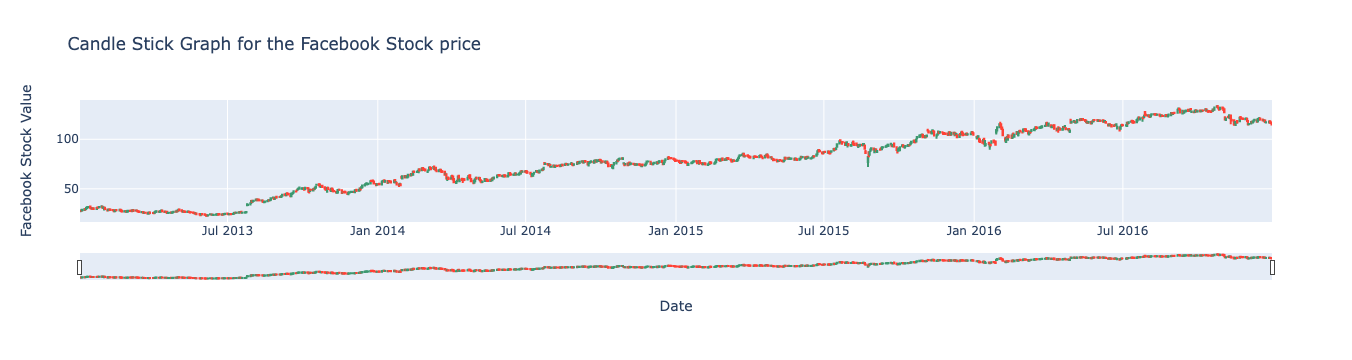

In [11]:
fig = go.Figure(data=[go.Candlestick(x=facebookPricesDf.index,
                open=facebookPricesDf['open'],
                high=facebookPricesDf['high'],
                low=facebookPricesDf['low'],
                close=facebookPricesDf['close'])])
fig.update_layout(
    title='Candle Stick Graph for the Facebook Stock price',
    yaxis_title='Facebook Stock Value',
    xaxis_title='Date',
)

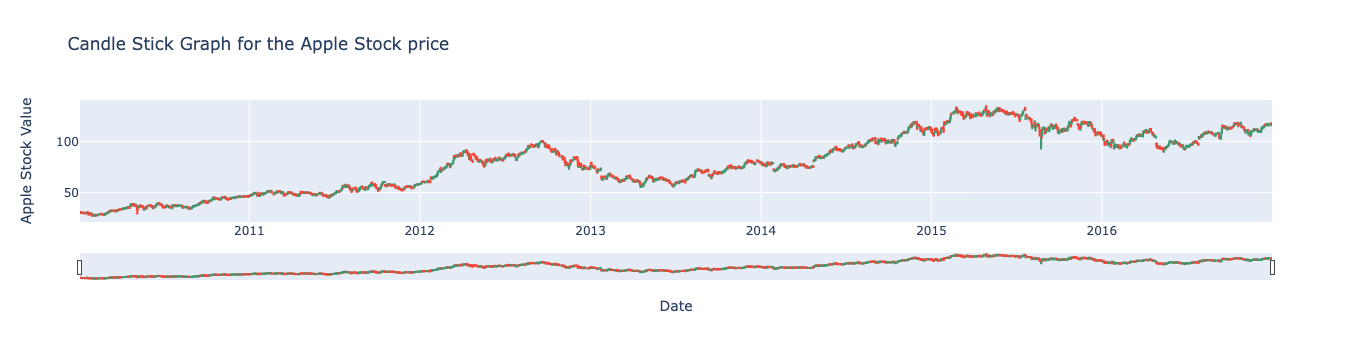

In [12]:
fig = go.Figure(data=[go.Candlestick(x=applePricesDf.index,
                open=applePricesDf['open'],
                high=applePricesDf['high'],
                low=applePricesDf['low'],
                close=applePricesDf['close'])])
fig.update_layout(
    title='Candle Stick Graph for the Apple Stock price',
    yaxis_title='Apple Stock Value',
    xaxis_title='Date',
)

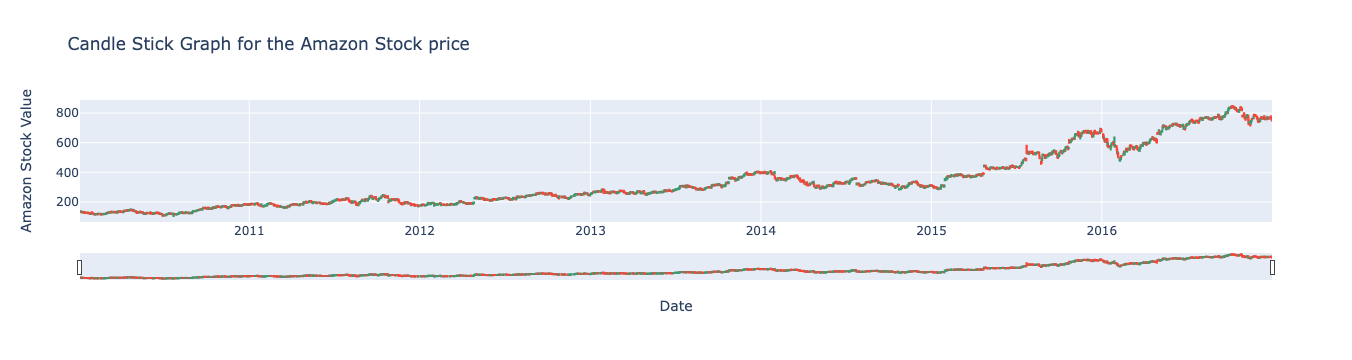

In [13]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=amazonPricesDf.index,
                open=amazonPricesDf['open'],
                high=amazonPricesDf['high'],
                low=amazonPricesDf['low'],
                close=amazonPricesDf['close'])])
fig.update_layout(
    title='Candle Stick Graph for the Amazon Stock price',
    yaxis_title='Amazon Stock Value',
    xaxis_title='Date',
)

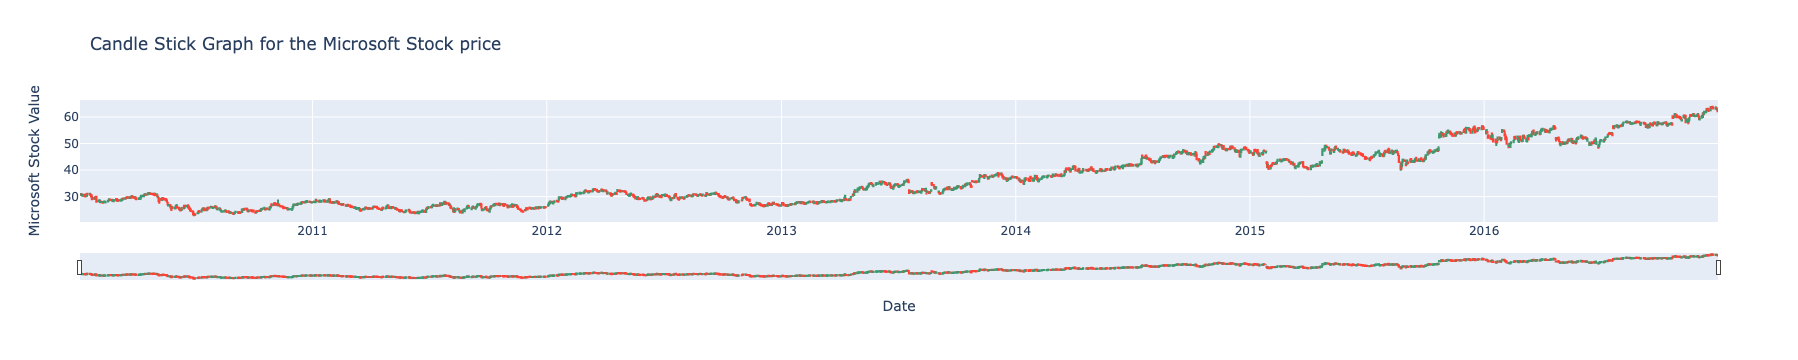

In [14]:
fig = go.Figure(data=[go.Candlestick(x=microsoftPricesDf.index,
                open=microsoftPricesDf['open'],
                high=microsoftPricesDf['high'],
                low=microsoftPricesDf['low'],
                close=microsoftPricesDf['close'])])
fig.update_layout(
    title='Candle Stick Graph for the Microsoft Stock price',
    yaxis_title='Microsoft Stock Value',
    xaxis_title='Date',
)

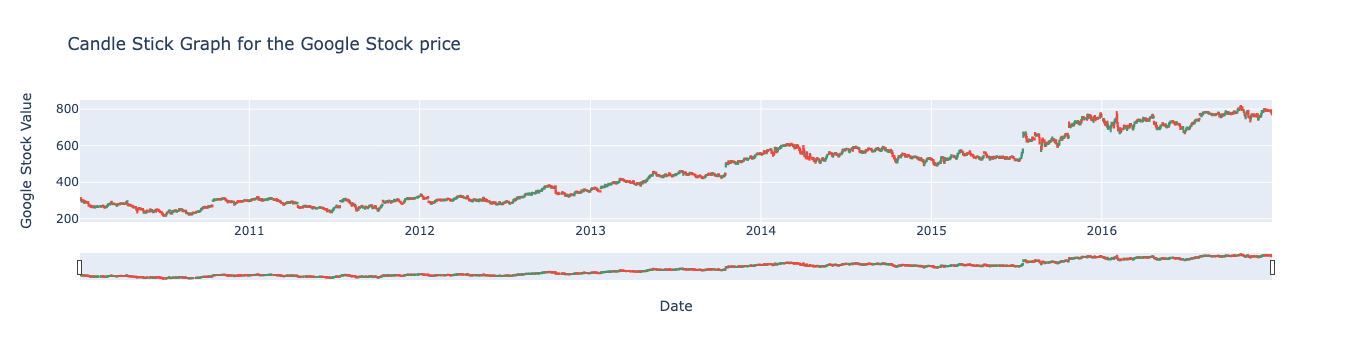

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=googlePricesDf.index,
                open=googlePricesDf['open'],
                high=googlePricesDf['high'],
                low=googlePricesDf['low'],
                close=googlePricesDf['close'])])
fig.update_layout(
    title='Candle Stick Graph for the Google Stock price',
    yaxis_title='Google Stock Value',
    xaxis_title='Date',
)

## Review
From the Data gven above, it can be easy to find a pattern for the individual stocks where Google stock provided the most stable growth over the 6 year period. This can seen from the lower volatility over the period of 6 years above and the high growth as it almost quadrupled the stock value to about \\$800 in 2016 from around \\$350 in 2010. Further, one can easily see Apple providing good value while being less volatile.
Some downtrends can also be generilzed since a similar decline in tech stocks was seen during first 2 weeks of 2016 which can be attributed to oil price variation and the risks regarding Chinese economy listed at [https://www.theguardian.com/business/2016/jan/15/us-stock-markets-fall-dow-oil-prices-china](https://www.theguardian.com/business/2016/jan/15/us-stock-markets-fall-dow-oil-prices-china).
This change also indicates a risk since the stock prices of these 5 companies are correlated and one can affect the others indirectly.


## Predicting from Averages
From the given values above, it may be difficult to predict the stock price given the smaller variations. We can easily draw charts for averages called Moving averages. Using the moving averages, we can minimize the noise and predict future performance of a stock value.

In [16]:
def MovingAverage(df, stock):
    df['MovingAverage2'] = df['close'].rolling(60).mean()
    df['MovingAverage4'] = df['close'].rolling(120).mean()
    df['close'].plot(figsize = (18,9))
    df['MovingAverage2'].plot()
    df['MovingAverage4'].plot()
    plt.title('Moving Average of '+stock+' stocks')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Stock Value (S)')

<ipython-input-16-e4a08e8b2079>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-e4a08e8b2079>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



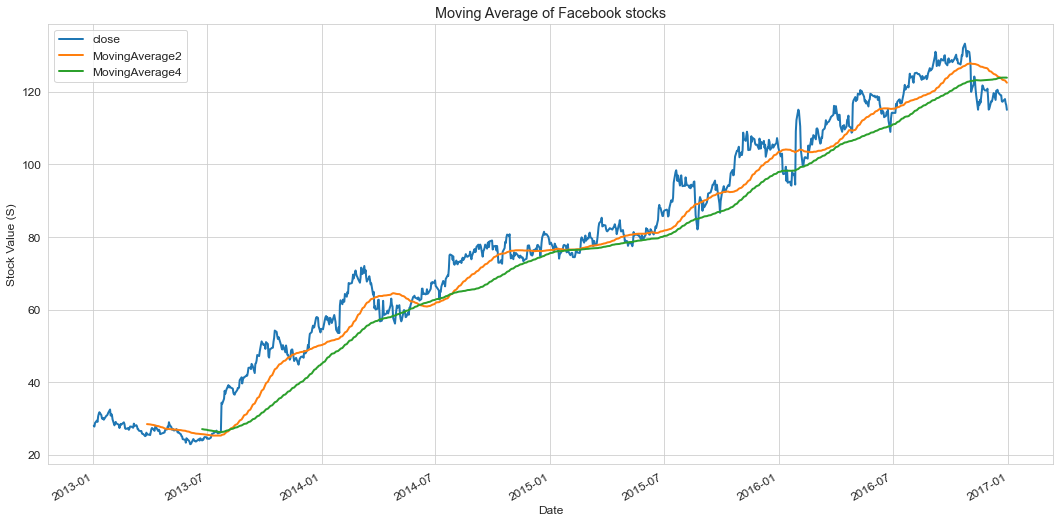

In [17]:
MovingAverage(facebookPricesDf, 'Facebook')

<ipython-input-16-e4a08e8b2079>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-e4a08e8b2079>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



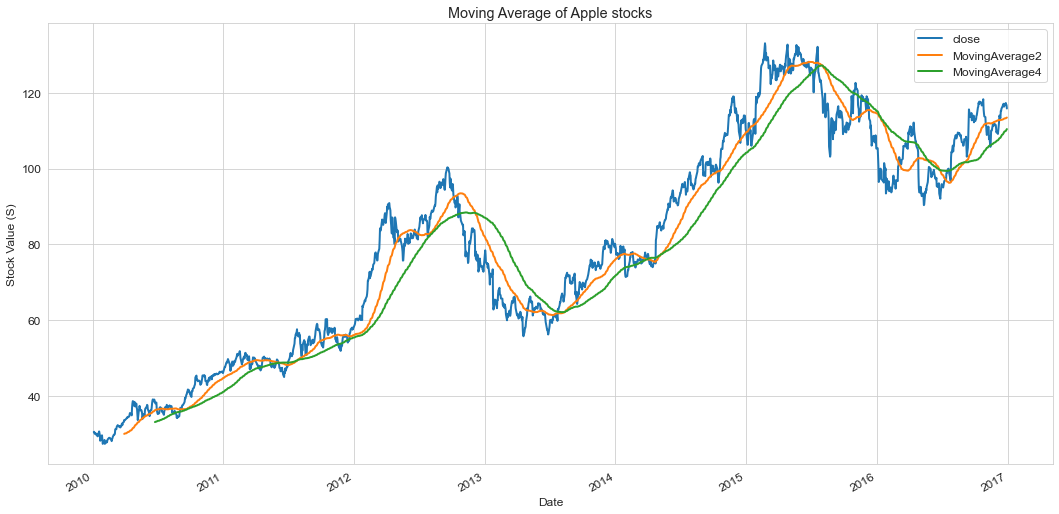

In [18]:
MovingAverage(applePricesDf, 'Apple')

<ipython-input-16-e4a08e8b2079>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-e4a08e8b2079>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



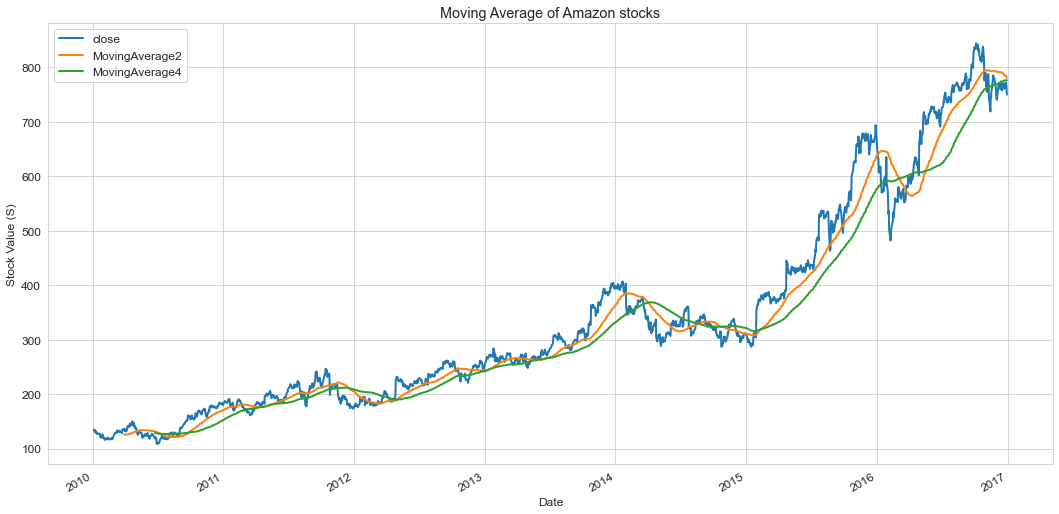

In [19]:
MovingAverage(amazonPricesDf, 'Amazon')

<ipython-input-16-e4a08e8b2079>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-e4a08e8b2079>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



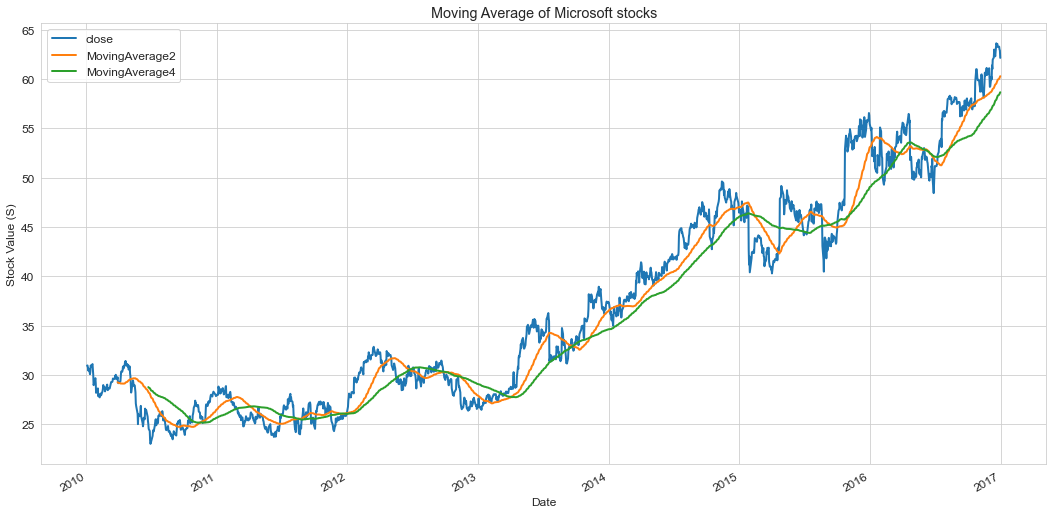

In [20]:
MovingAverage(microsoftPricesDf, 'Microsoft')

<ipython-input-16-e4a08e8b2079>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-e4a08e8b2079>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



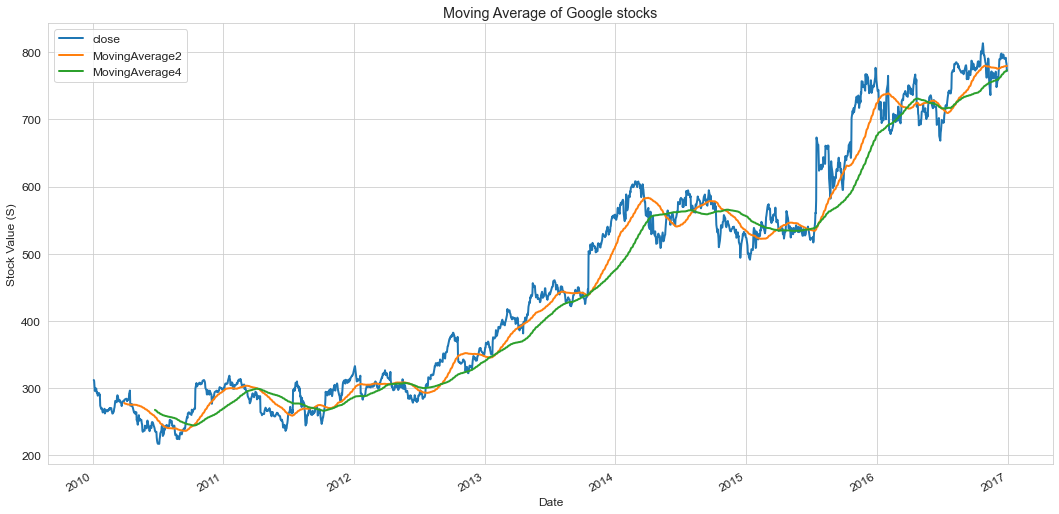

In [21]:
MovingAverage(googlePricesDf, 'Google')

## Review
The Microsoft and Amazon stocks seems to be providing great outlook going forward given their moving averages looking up. While the other 3 stocks did not provide enough feedback, we can still consider them good investments given their moving averages moving up year over year.

## Stock Return Prediction
Next, we need to validate the return values for each individual stock. In order to find so, we will be calculating year over year changes in daily stock close values and anlyze it using a violin chart given below.

In [7]:
facebookPricesDf['returns'] = (facebookPricesDf['close']/facebookPricesDf['close'].shift(1))-1
applePricesDf['returns'] = (applePricesDf['close']/applePricesDf['close'].shift(1))-1
amazonPricesDf['returns'] = (amazonPricesDf['close']/amazonPricesDf['close'].shift(1))-1
microsoftPricesDf['returns'] = (amazonPricesDf['close']/amazonPricesDf['close'].shift(1))-1
googlePricesDf['returns'] = (googlePricesDf['close']/googlePricesDf['close'].shift(1))-1

<ipython-input-7-106ef466bdd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebookPricesDf['returns'] = (facebookPricesDf['close']/facebookPricesDf['close'].shift(1))-1
<ipython-input-7-106ef466bdd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applePricesDf['returns'] = (applePricesDf['close']/applePricesDf['close'].shift(1))-1
<ipython-input-7-106ef466bdd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<AxesSubplot:>

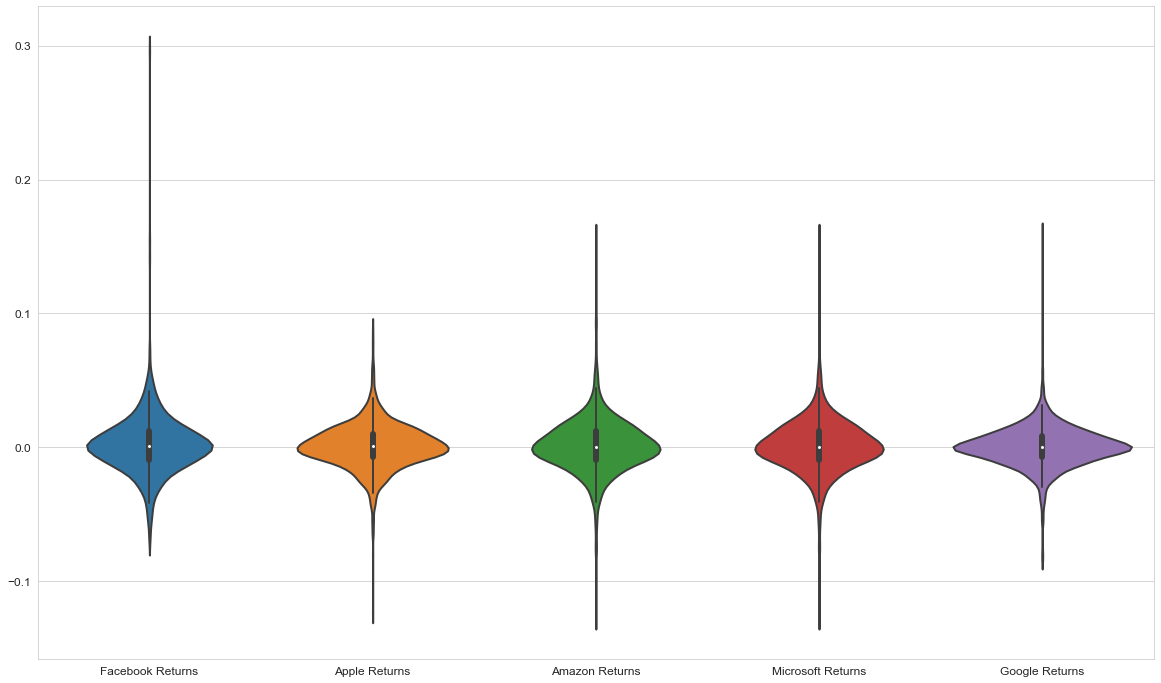

In [23]:
gnt_returns = pd.concat([facebookPricesDf['returns'], applePricesDf['returns'], amazonPricesDf['returns'], microsoftPricesDf['returns'], googlePricesDf['returns']], axis=1)
gnt_returns.columns = ['Facebook Returns', 'Apple Returns', 'Amazon Returns', 'Microsoft Returns', 'Google Returns', ]
sns.violinplot(data=gnt_returns)

## Cumulative Returns
We will be plotting a line graph for the FAAMG stock returns. Using the plot, we can predict the average returns and make wise investment decisions.

<ipython-input-8-6e56244613ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebookPricesDf['Cumulative Return'] = (1+facebookPricesDf['returns']).cumprod()-1
<ipython-input-8-6e56244613ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applePricesDf['Cumulative Return'] = (1+applePricesDf['returns']).cumprod()-1
<ipython-input-8-6e56244613ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

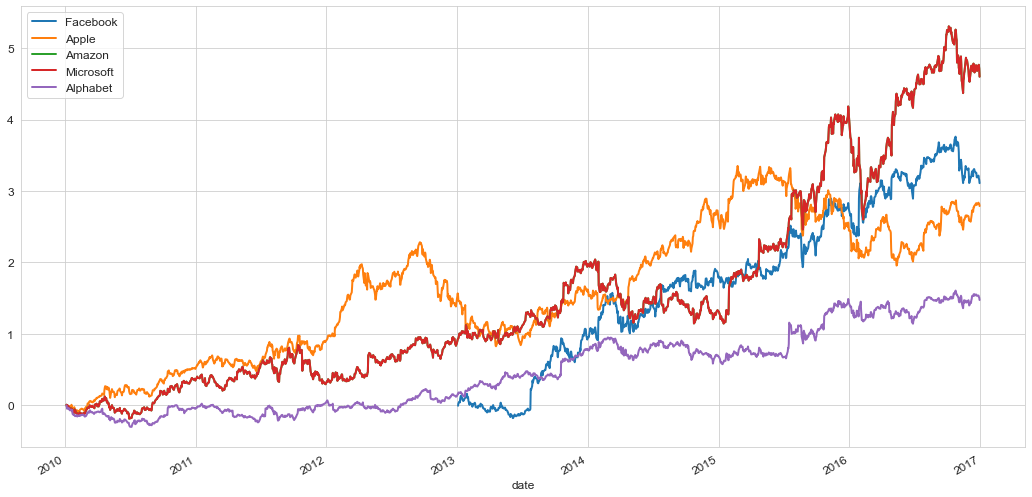

In [8]:
facebookPricesDf['Cumulative Return'] = (1+facebookPricesDf['returns']).cumprod()-1
applePricesDf['Cumulative Return'] = (1+applePricesDf['returns']).cumprod()-1
amazonPricesDf['Cumulative Return'] = (1+amazonPricesDf['returns']).cumprod()-1
microsoftPricesDf['Cumulative Return'] = (1+microsoftPricesDf['returns']).cumprod()-1
googlePricesDf['Cumulative Return'] = (1+googlePricesDf['returns']).cumprod()-1

# Draw Line graph for the return values.
facebookPricesDf['Cumulative Return'].plot(label = "Facebook", figsize = (18, 9))
applePricesDf['Cumulative Return'].plot(label = 'Apple', figsize = (18, 9))
amazonPricesDf['Cumulative Return'].plot(label = 'Amazon', figsize = (18, 9))
microsoftPricesDf['Cumulative Return'].plot(label = "Microsoft", figsize = (18, 9))
googlePricesDf['Cumulative Return'].plot(label = "Alphabet", figsize = (18, 9))
plt.legend()

## Conclusion
A clear trend from the 6 year data for daily low and high prices for each stock show that the Tech stocks listed above had shown great value for investment where the
average return hovered around 200% - 800%. Also, most of the stocks performed fairly well post 2010 with significant price grwoth in 2016 for some of them. This shows confidence in the market over the period of 2010-2016 indicating value investment over the years was great. The market did fluctuate over shorter periods but longer period have shown positive outcome.
Going over the individual stocks, it can be seen that while all tech stocks provide good investment opportunity, Google provides the best option with low volatility and high yield while Amazon and Microsoft provide highest return with high volatility which may be ideal for investors who can handle high risk in hopes of high return.

# Method Chaining

In [44]:
import pandas as pd
import numpy as np

In [45]:
    def data_loader(url_or_path_to_csv_file):
    
       # Method Chain 1 (Load data,rename columns, get rid of null values and drop necessary data with missing data)\n",
    
        df1 = (
              pd.read_csv(url_or_path_to_csv_file)
            .sort_values("date")
            .dropna(axis=0)
            )
        df1['reported_year'] = pd.to_datetime(df1['date']).dt.year
        df1['reported_month'] = pd.to_datetime(df1['date']).dt.month
    
        return df1

In [46]:
testDf = data_loader("../data/raw/prices-split-adjusted.csv")

In [47]:
testDf

,date,symbol,open,close,low,high,volume,reported_year,reported_month
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0,2010,1
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0,2010,1
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0,2010,1
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0,2010,1
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0,2010,1
...,...,...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0,2016,12
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0,2016,12
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0,2016,12
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0,2016,12


In [48]:
testDf.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,6.499362e+01,7.520389e+01,1.66,3.127000e+01,4.846000e+01,7.512000e+01,1.584440e+03
close,851264.0,6.501191e+01,7.520122e+01,1.59,3.129278e+01,4.848000e+01,7.514000e+01,1.578130e+03
low,851264.0,6.433654e+01,7.445952e+01,1.50,3.094000e+01,4.797000e+01,7.440000e+01,1.549940e+03
high,851264.0,6.563975e+01,7.590686e+01,1.81,3.162000e+01,4.896000e+01,7.585000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08
reported_year,851264.0,2.013050e+03,2.001677e+00,2010.00,2.011000e+03,2.013000e+03,2.015000e+03,2.016000e+03
reported_month,851264.0,6.555364e+00,3.425193e+00,1.00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01


In [49]:
testDf.describe(include=[np.number]) 

,open,close,low,high,volume,reported_year,reported_month
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05,851264.000000,851264.000000
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06,2013.050484,6.555364
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07,2.001677,3.425193
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00,2010.000000,1.000000
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06,2011.000000,4.000000
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06,2013.000000,7.000000
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06,2015.000000,10.000000
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08,2016.000000,12.000000


In [50]:
testDf2=testDf.loc[testDf['symbol'].isin(['FB', 'AAPL', 'AMZN', 'MSFT', 'GOOG'])]
testDf2.to_csv('../data/processed/filtered_tableau_data.csv')

In [51]:
testDf3=testDf.loc[testDf['symbol'].isin(['GOOG'])]
testDf3.to_csv('../data/processed/google_tableau_data.csv')

In [52]:
testDf4=testDf.loc[testDf['symbol'].isin(['AMZN'])]
testDf4.to_csv('../data/processed/amazon_tableau_data.csv')

# Module Testing

In [53]:
import project_functions1 as p1
testDf = p1.load_and_process("../data/raw/prices-split-adjusted.csv")

In [54]:
testDf

,date,symbol,open,close,low,high,volume,reported_year,reported_month
646,2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0,2010,1
473,2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0,2010,1
474,2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0,2010,1
475,2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0,2010,1
476,2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0,2010,1
...,...,...,...,...,...,...,...,...,...
850922,2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0,2016,12
850921,2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0,2016,12
850920,2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0,2016,12
850933,2016-12-30,EXR,75.669998,77.239998,75.110001,77.300003,884400.0,2016,12


# Task 4
See group notebook.